In [1]:
import pandas as pd
import urllib
import requests 
import os
import tweepy
from timeit import default_timer as timer
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gathering

## Twitter Archive Enhanced Data

In [2]:
#read in the twitter-archive-enhanced data.
df = pd.read_csv('twitter-archive-enhanced.csv')

In [102]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Image Prediction data 

In [3]:
# Use the Python Request library to obtain the image prediction data
folder_name = 'Image-Predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [106]:
os.listdir(folder_name)

['image-predictions.tsv']

In [107]:
# Now that the image prediction file is in the directory, open using pd.read_csv and the tab separator.
img_pred = pd.read_csv('Image-predictions.tsv/image-Predictions.tsv', sep='\t')

In [108]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Additional columns via Twitter API

In [109]:
# Instead, using the tweet-json.txt file provided by Udacity, read the file into a dataframe line by line.
tweets = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        tweets.append({'tweet_id': tweet_id,
                      'retweet_count': retweet_count,
                      'favorite_count': fav_count,
                      'user_count': user_count})
api_df = pd.DataFrame(data=tweets)

In [110]:
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


# Assessing

## Twitter Archive Enhanced Data

In [111]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [113]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [114]:
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [115]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [116]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [117]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [118]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Image Prediction Data

In [119]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [120]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [121]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Additional Columns via Twitter API

In [122]:
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [123]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [124]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


>### Quality

- Time stamp as datatype object isn't right, it should be datetime object. Also the 'Source' and combined 'dog_stage' column (mentioned in tidiness section) should be categorical datatypes.
- The dataframe contains some retweets at present but we only want original tweets.
- The dataframe also contains replies which don't meet criteria for original tweets.
- We only want tweets that have associated dog pictures.
- The ratings provided are not all in the correct form.
- There are only 3 values in the Source column and they are difficult to read in present form.
- There is inconsistency with regard to null values, as we see both 'none' and NAN present in the 'Twitter Archive Enhanced Data' table.
- Remove all the unnecessary columns, especially everything but the most accurate dog image prediction, from the final merged dataframe.

>### Tidiness

-  We can combine all the tables together, excluding the unnecessary image columns
- The last four columns of the 'Twitter Archive Enhanced Data' table can be combined into a single dog stage column.

In [125]:
# Save a copy of the dataframes to allow you to clean freely
arch_data = df.copy()

In [126]:
img_data = img_pred.copy()

In [127]:
api_data = api_df.copy

# Cleaning

### Define
Combining datasets to make it easier to deal with

### Code

In [128]:
df2 = pd.merge(df, api_df, on='tweet_id')

In [129]:
df_comb = pd.merge(df2, img_data, on='tweet_id')

### Test

In [130]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [131]:
df_comb

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Define
Combine the three dog stages columns into one column

### Code

In [132]:
df_comb.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1753
1,None,None,None,puppo,23
2,None,None,pupper,None,210
3,None,floofer,None,None,7
4,doggo,None,None,None,67
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,11
7,doggo,floofer,None,None,1


In [133]:
df_comb.doggo.replace('None', '', inplace=True)
df_comb.doggo.replace(np.NaN, '', inplace=True)
df_comb.pupper.replace('None', '', inplace=True)
df_comb.pupper.replace(np.NaN, '', inplace=True)
df_comb.puppo.replace('None', '', inplace=True)
df_comb.puppo.replace(np.NaN, '', inplace=True)
df_comb.floofer.replace('None', '', inplace=True)
df_comb.floofer.replace(np.NaN, '', inplace=True)

In [134]:
df_comb['stage'] = df_comb.doggo + df_comb.floofer + df_comb.pupper + df_comb.puppo
df_comb.loc[df_comb.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_comb.loc[df_comb.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_comb.loc[df_comb.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

### Test

In [135]:
df_comb.stage.value_counts()

                  1753
pupper             210
doggo               67
puppo               23
doggo, pupper       11
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [136]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Define
Change datatype of stage column to categorical

### Code

In [137]:
df_comb['stage'] = df_comb.stage.astype('category')

### Test

In [138]:
df_comb.stage.dtype

CategoricalDtype(categories=['', 'doggo', 'doggo, floofer', 'doggo, pupper',
                  'doggo, puppo', 'floofer', 'pupper', 'puppo'],
                 ordered=False)

### Define
- Remove the replies.

### Code

In [139]:
df_comb = df_comb[df_comb['in_reply_to_status_id'].isnull()]

### Test

In [140]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2050 non-null   int64   
 1   in_reply_to_status_id       0 non-null      float64 
 2   in_reply_to_user_id         0 non-null      float64 
 3   timestamp                   2050 non-null   object  
 4   source                      2050 non-null   object  
 5   text                        2050 non-null   object  
 6   retweeted_status_id         79 non-null     float64 
 7   retweeted_status_user_id    79 non-null     float64 
 8   retweeted_status_timestamp  79 non-null     object  
 9   expanded_urls               2050 non-null   object  
 10  rating_numerator            2050 non-null   int64   
 11  rating_denominator          2050 non-null   int64   
 12  name                        2050 non-null   object  
 13  doggo             

### Define
- Remove the Retweets

### Code

In [141]:
df_comb = df_comb[df_comb['retweeted_status_id'].isnull()]

### Test

In [142]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1971 non-null   int64   
 1   in_reply_to_status_id       0 non-null      float64 
 2   in_reply_to_user_id         0 non-null      float64 
 3   timestamp                   1971 non-null   object  
 4   source                      1971 non-null   object  
 5   text                        1971 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1971 non-null   object  
 10  rating_numerator            1971 non-null   int64   
 11  rating_denominator          1971 non-null   int64   
 12  name                        1971 non-null   object  
 13  doggo             

### Define

- Convert the timestamp column to a datetime object.

### Code

In [143]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Test

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define
Correct the ratings for those with decimals

### Code

In [145]:
# not sure but might have already been a float
df_comb['rating_numerator'] = df_comb.rating_numerator.astype(float)

In [146]:
ratings = df_comb.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [147]:
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2068,5,10
2069,6,10
2070,9,10
2071,7,10


In [148]:
ratings['rating_numerator'] = ratings[0].astype(float)

In [149]:
ratings['rating_denominator'] = ratings[1].astype(int)

In [150]:
df_comb['rating_numerator'] = ratings['rating_numerator'].values

In [151]:
df_comb['rating_denominator'] = ratings['rating_denominator'].values

### Test

In [152]:
df_comb[df_comb['rating_numerator']==75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage


In [153]:
df_comb[df_comb['tweet_id']==786709082849828864].rating_numerator

558    9.75
Name: rating_numerator, dtype: float64

In [154]:
df_comb[df_comb['tweet_id']==786709082849828864].rating_denominator

558    10
Name: rating_denominator, dtype: int32

### Define
Clean up the ratings with denominators not equal to 10

### Code

In [155]:
df_comb[df_comb['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
345,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,
415,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,
734,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,
876,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,...,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,
924,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,...,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,
967,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,...,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,
1001,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,
1022,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,...,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,
1047,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,...,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,
1065,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,...,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,


In [156]:
# Checking the ratings and text manually and replacing with the actual rating values:
#first column above:
df_comb['rating_denominator'] = df_comb['rating_denominator'].replace(['2'],'10')
df_comb['rating_numerator'] = df_comb['rating_numerator'].replace(['1'],'9')
#third column above:
df_comb['rating_denominator'] = df_comb['rating_denominator'].replace(['11'],'10')
df_comb['rating_numerator'] = df_comb['rating_numerator'].replace(['7'],'10')
# sixth column above
df_comb['rating_denominator'] = df_comb['rating_denominator'].replace(['50'],'10')
df['rating_numerator'] = df_comb['rating_numerator'].replace(['50'],'11')
# eighth column above:
df_comb['rating_denominator'] = df_comb['rating_denominator'].replace(['20'],'10')
df_comb['rating_numerator'] = df_comb['rating_numerator'].replace(['4'],'13')
# fourteenth column 
df_comb['rating_denominator'] = df_comb['rating_denominator'].replace(['7'], 'NaN')
df_comb['rating_numerator'] = df_comb['rating_numerator'].replace(['24'],'NaN')
# sixteenth column above:
df_comb['rating_denominator'] = df_comb['rating_denominator'].replace(['11'],'10')
df_comb['rating_numerator'] = df_comb['rating_numerator'].replace(['9'],'14')

### Test

In [157]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1971 non-null   int64   
 1   in_reply_to_status_id       0 non-null      float64 
 2   in_reply_to_user_id         0 non-null      float64 
 3   timestamp                   1971 non-null   object  
 4   source                      1971 non-null   object  
 5   text                        1971 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1971 non-null   object  
 10  rating_numerator            1971 non-null   float64 
 11  rating_denominator          1971 non-null   int32   
 12  name                        1971 non-null   object  
 13  doggo             

### Define

- Clean up the source column to make it easier to read.

### Code

In [158]:
df_comb.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
           "Twitter for iPhone", 
           inplace=True)

In [159]:
df_comb.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
           "Twitter Web Client", 
           inplace=True)

In [160]:
df_comb.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 
           "TweetDeck", 
           inplace=True)

### Test

In [161]:
df_comb.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Define

- Convert the source column to categorical datatype.

### Code

In [162]:
df_comb['source'] = df_comb.source.astype('category')

### Test

In [163]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1971 non-null   int64   
 1   in_reply_to_status_id       0 non-null      float64 
 2   in_reply_to_user_id         0 non-null      float64 
 3   timestamp                   1971 non-null   object  
 4   source                      1971 non-null   category
 5   text                        1971 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      float64 
 9   expanded_urls               1971 non-null   object  
 10  rating_numerator            1971 non-null   float64 
 11  rating_denominator          1971 non-null   int32   
 12  name                        1971 non-null   object  
 13  doggo             

### Define
- Replace any 'none' values with NAN for consistency.

### Code

In [164]:
df_comb = df_comb.replace('None', np.nan)

### Test

In [165]:
df_comb

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,


### Define
- Combine the predictions for the dog image into one column with an associated dog image.

### Code

In [166]:
def dog_pred(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

df_comb['dog_pred'] = df_comb.apply(dog_pred, axis = 1)

### Test

In [167]:
df_comb

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,dog_pred
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,,miniature_pinscher
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,,Rhodesian_ridgeback
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,,German_shepherd
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,,redbone


### Define
- Drop unnecessary columns to make our dataframe tidier.

In [168]:
df_comb = df_comb.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'user_count', 'jpg_url', 'img_num'])

### Test

In [169]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   category
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   float64 
 6   rating_denominator  1971 non-null   int32   
 7   name                1447 non-null   object  
 8   doggo               1971 non-null   object  
 9   floofer             1971 non-null   object  
 10  pupper              1971 non-null   object  
 11  puppo               1971 non-null   object  
 12  retweet_count       1971 non-null   int64   
 13  favorite_count      1971 non-null   int64   
 14  stage               1971 non-null   category
 15  dog_pred            1666 non-null   ob

In [170]:
# Save the master version of the final dataframe.
df_comb.to_csv('twitter_archive_master.csv', index = False)

## Visualising

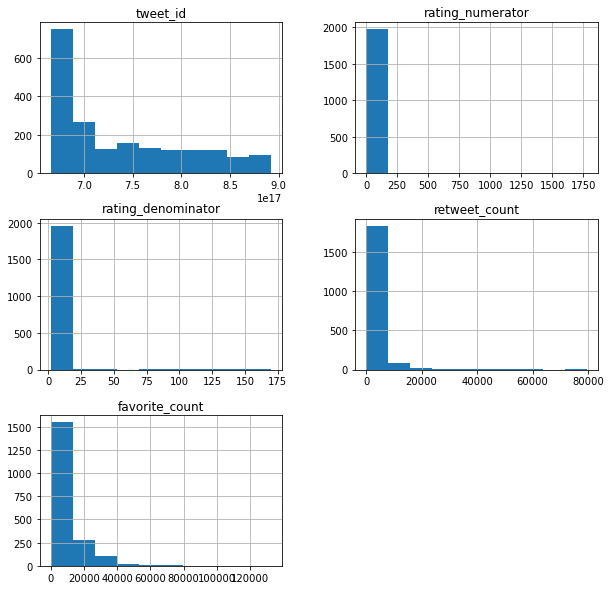

In [171]:
df_comb.hist(figsize=(10,10));

- We can see the skew associated with the favorite_count and retweet_count are very skewed to the right, whilst the ratings are skewed to the left, with the majority of dog owners scoring their dogs a minimum of a 10.

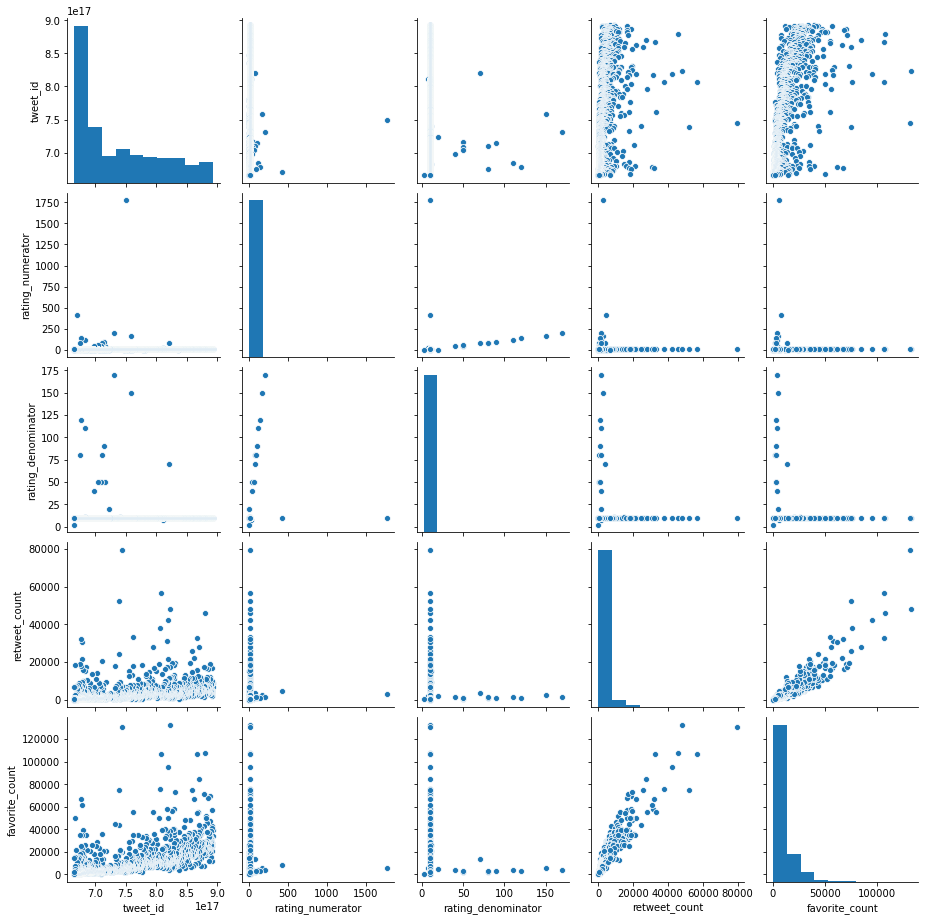

In [172]:
sns_scatterplt = sns.pairplot(df_comb)

There isn't much by way of correlation to be drawn from the scatter plots apart from the relationship between the retweet and favourite count which shows a strong positive correlation. This makes sense as they are both options for viewers to react to tweets on the app, and both a favourite and retweet perform similar functions in terms of expressing postitive reaction to a tweet. There also appears to be a slight correlation between the favourite/retweet count and the rating ascribed to the dog by the tweeter. 

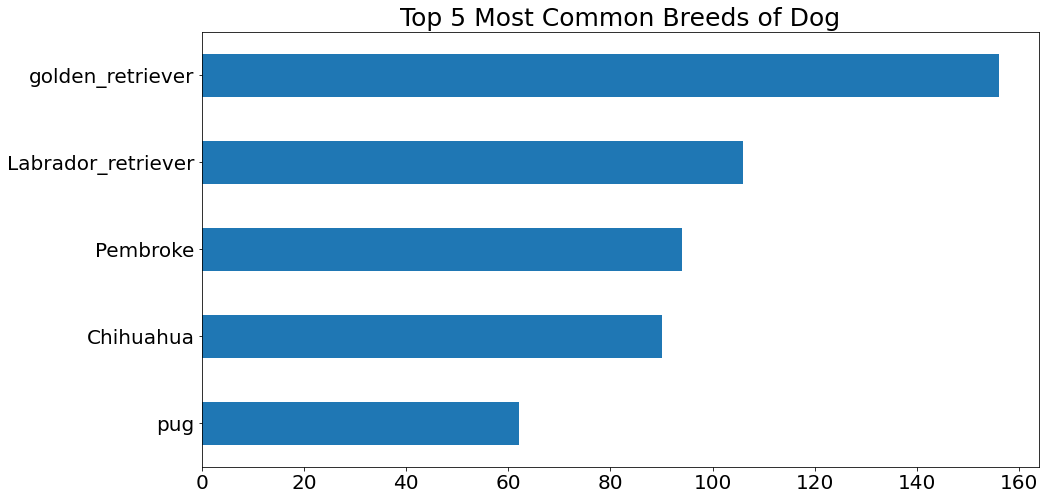

In [173]:
plt.figure(figsize=(15,8))
plt.title("Top 5 Most Common Breeds of Dog", size=25)
df_comb['dog_pred'].value_counts()[4::-1].plot(kind='barh',fontsize=20);

Golden retrievers were by far the most popular type of dog, outscoring the closest rival by nearly 50%. In fact, labrador retriever is the second most popularly uploaded, meaning the retriever is clearly the most popularly uploaded type of dog on the we_rate_dogs app.

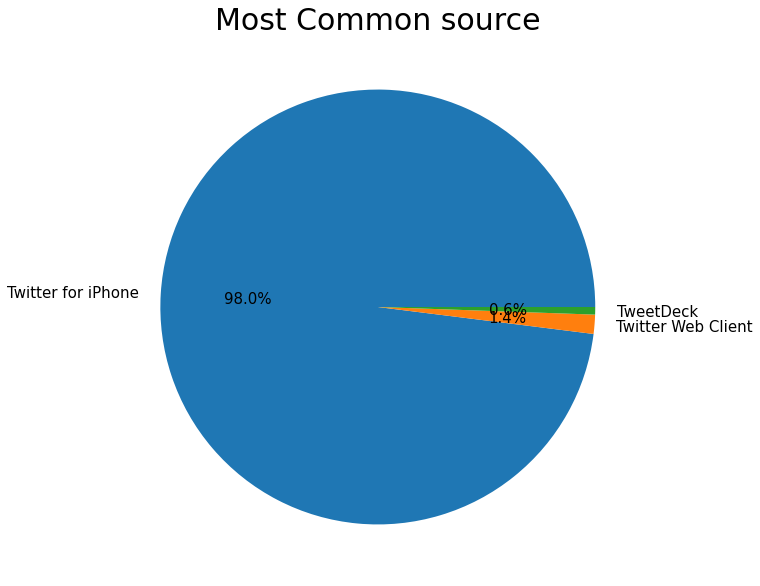

In [174]:
plt.title("Most Common source", size=30)
df_comb['source'].value_counts().plot(kind='pie',figsize=(10,10),fontsize=15, autopct='%1.1f%%')
plt.ylabel('');

The overwhelming majority of tweets were sent via 'Twitter for iPhone', with a small Twitter Web Client being the second most popular.

Text(0.5, 1.0, 'Retweets vs Favourites Scatter plot')

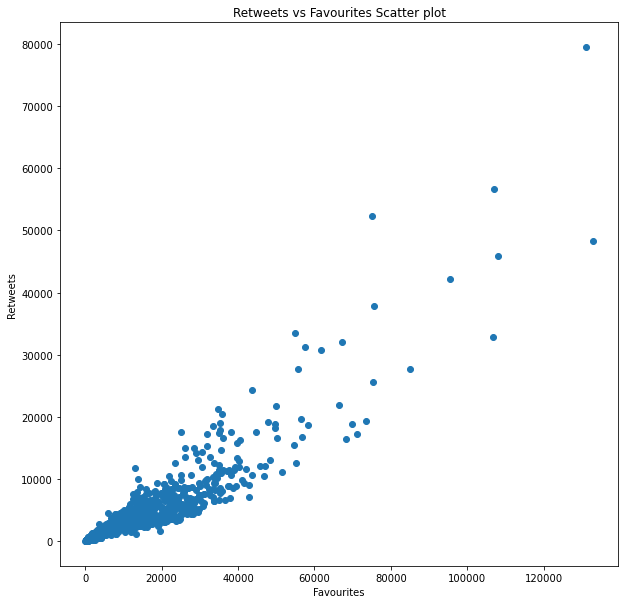

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(df_comb['favorite_count'], df_comb['retweet_count'])
plt.xlabel('Favourites')
plt.ylabel('Retweets')
plt.title('Retweets vs Favourites Scatter plot')

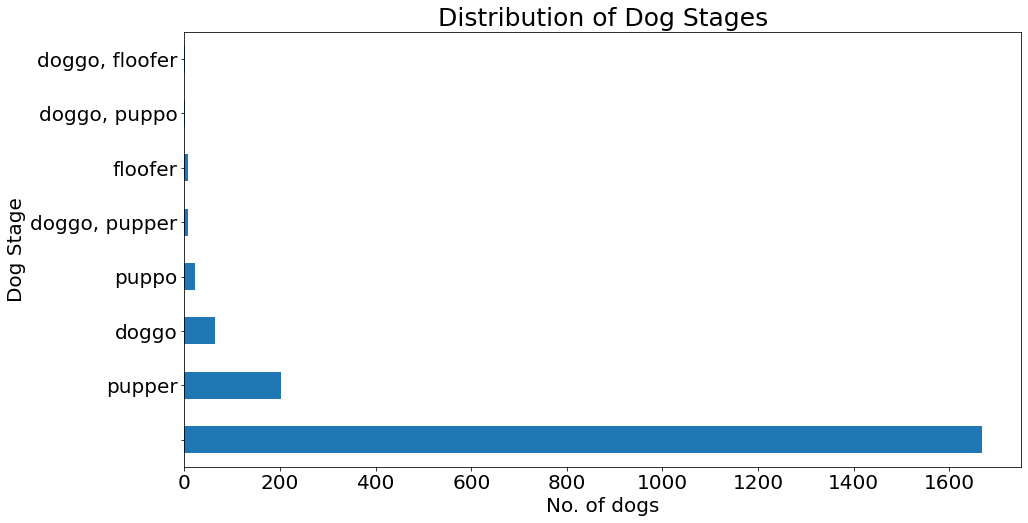

In [176]:
plt.figure(figsize=(15,8))
plt.title("Distribution of Dog Stages", size=25)
plt.ylabel("Dog Stage", size=20)
plt.xlabel("No. of dogs", size = 20)
df_comb['stage'].value_counts().plot(kind='barh',fontsize=20);

As seen above, the majority of dogs are not identified, but of those that are, puppers are by far the most frequently occuring in the dataset, with data on floofers in particular being scarce.

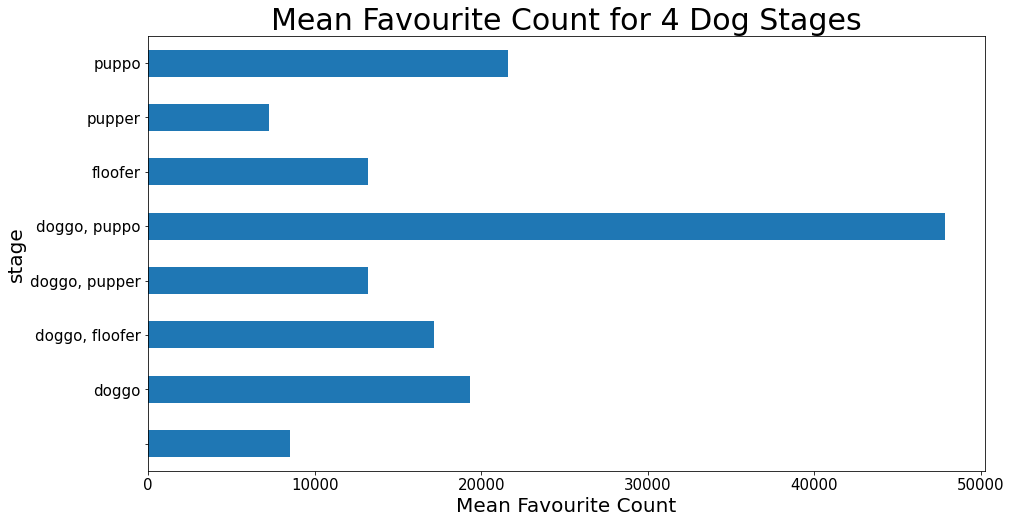

In [177]:
plt.figure(figsize=(15,8))
plt.title("Mean Favourite Count for 4 Dog Stages", size=30)
plt.ylabel("Dog Stage", size=20)
plt.xlabel("Mean Favourite Count", size=20)
df_comb.groupby(['stage']).favorite_count.mean().plot(kind='barh', fontsize=15);

The Mean Favourite count for each dog above gives us an indication of the popularity of the dogs amongst twitter users. As can be seen above, the combination of puppers and doggos seems to be the overwhelming favourite, but amongst each individual class, puppers prove to be the favourite when it comes to the stage of the dogs, as they are the youngest, they are probably well liked for being the cutest of the dog. Doggos-the elder dogs- interestingly outscore their teenage counterparts, the 'puppers', whilst the fluffy dogs know as floofers score somewhere in between for popularity.

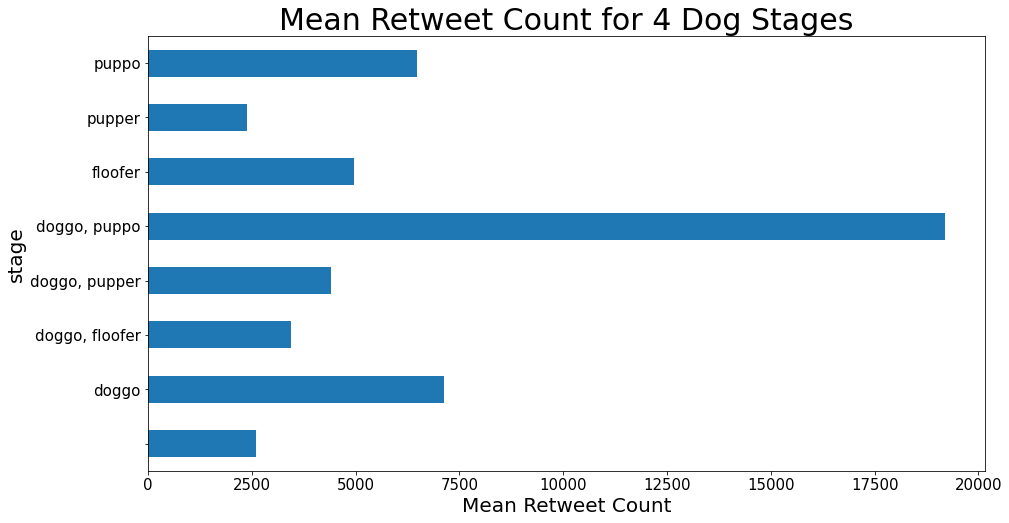

In [178]:
plt.figure(figsize=(15,8))
plt.title("Mean Retweet Count for 4 Dog Stages", size=30)
plt.ylabel("Dog_stage", size=20)
plt.xlabel("Mean Retweet Count", size=20)
df_comb.groupby(['stage']).retweet_count.mean().plot(kind='barh', fontsize=15);

As we would expect, we see a very similar distribution for the mean retweet count of each dog stage, as the retweet count is correlated strongly with favourite count and both represent ways to measure the popularity of the dogs. The only difference being that interestingly, the 'doggos' slightly outscore the 'puppos' when it comes to retweet count.